## Example for Binney -- Binomial Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from binney.run.run import BinneyRun
from binney.utils import logit

In [4]:
np.random.seed(0)
n = 100
x = np.random.uniform(low=0, high=np.pi, size=n)
p = np.exp(np.sin(x)) / (1 + np.exp(np.sin(x)))
df = pd.DataFrame({
    'success': np.random.binomial(n=100, size=len(p), p=p),
    'total': np.repeat(100, repeats=len(p)),
    'p': p,
    'x1': x
})
df.sort_values('x1', inplace=True)
df['p_hat'] = df['success'] / df['total']

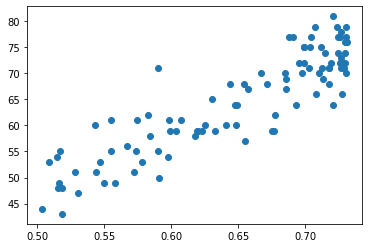

In [5]:
plt.scatter(df.p, df.success)

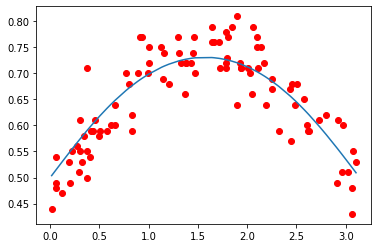

In [6]:
plt.plot(df.x1, df.p)
plt.scatter(df.x1, df.p_hat, color='red')

In [7]:
splines = {
    'x1': {
        'degree': 3,
        'knots_num': 4,
        'knots_type': 'frequency',
        'decreasing': False,
        'convex': False,
        'concave': False
    }
}
b_run = BinneyRun(
    col_success='success',
    col_total='total',
    df=df,
    splines=splines,
    solver_method='ipopt',
    data_type='binomial'
)
b_run.fit()
predictions = b_run.predict()

### Graph for p

Text(0.5, 1.0, 'Logit P')

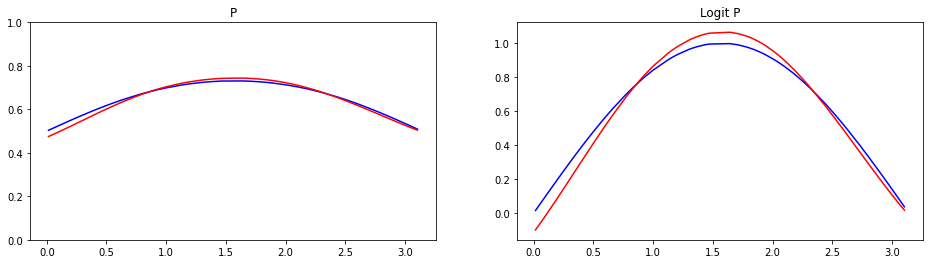

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(df.x1, df.p, color='blue')
ax[0].plot(df.x1, predictions, color='red')
ax[0].set_ylim([0, 1])
ax[0].set_title("P")
ax[1].plot(df.x1, logit(df.p), color='blue')
ax[1].plot(df.x1, logit(predictions), color='red')
ax[1].set_title("Logit P")

## Make Uncertainty

In [9]:
b_run.make_uncertainty(n_boots=50)

In [10]:
draws = b_run.predict_draws(df=df)

Text(0.5, 1.0, 'Distribution of spline parameters across bootstraps')

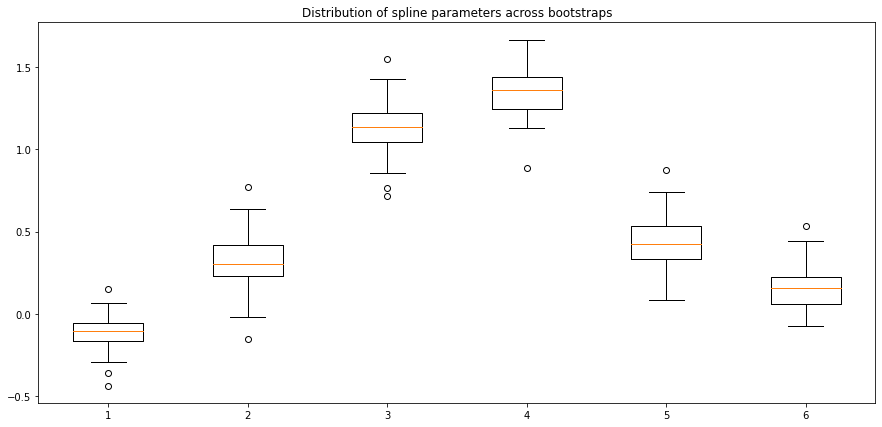

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
box = ax.boxplot(b_run.bootstrap.parameters)
ax.set_title("Distribution of spline parameters across bootstraps")

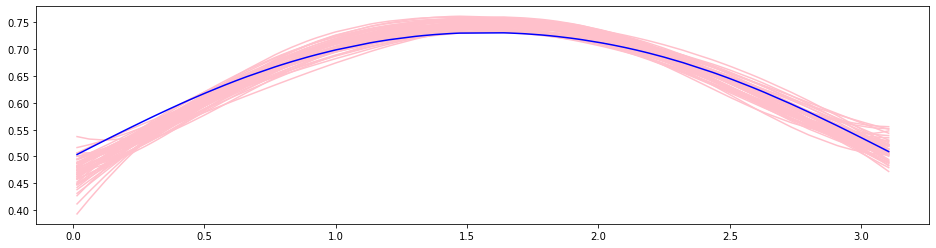

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
for draw in range(draws.shape[0]):
    ax.plot(df.x1, draws[draw, :], color='pink')
ax.plot(df.x1, df.p, color='blue')